In [1]:
####Library Importation

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


####Data Loading

df = pd.read_csv("EnergyProduction.csv", index_col='DATE', parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


## Exploratory Data Analysis

In [2]:
df.columns

Index(['EnergyIndex'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1970-01-01 to 1989-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EnergyIndex  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [4]:
df.isna().sum()

EnergyIndex    0
dtype: int64

<AxesSubplot:xlabel='EnergyIndex'>

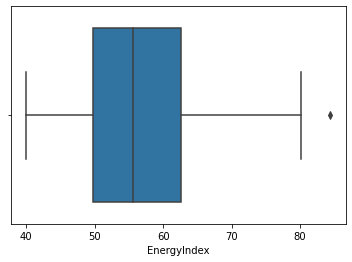

In [5]:
##Outlier Detection
sns.boxplot(x= df['EnergyIndex'])

<AxesSubplot:title={'center':'Normal Energy Index plot'}, xlabel='DATE'>

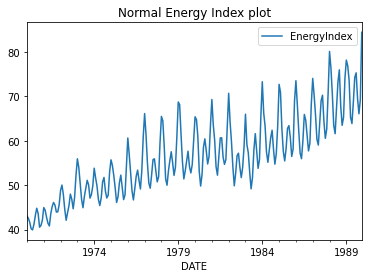

In [6]:
df[['EnergyIndex']].plot(title='Normal Energy Index plot')

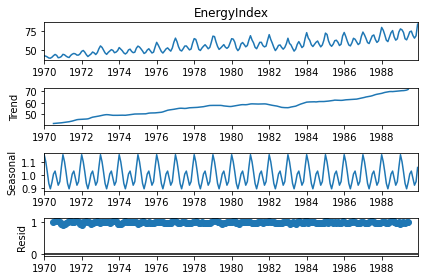

In [7]:
##Decompose the Time series

decompose_result = seasonal_decompose(df["EnergyIndex"],model="multiplicative")
decompose_result.plot();

# Holt winters fitted model using Single, Double, Additiona and Triple exponential model with multiplicative models

In [8]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = "MS"
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

In [9]:
###Single HWES

df["HWES1"] = SimpleExpSmoothing(df["EnergyIndex"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df.head()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,EnergyIndex,HWES1
DATE,,
1970-01-01,43.0869,43.086900
1970-02-01,42.5577,43.086900
1970-03-01,41.6215,43.064850
1970-04-01,40.1982,43.004710
1970-05-01,39.9321,42.887772


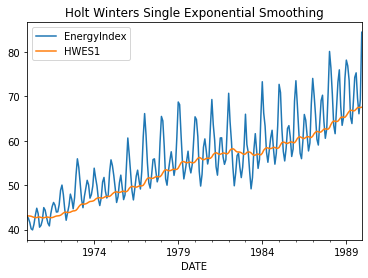

In [10]:
####Sinle Holt winter exponential smooting
df[["EnergyIndex","HWES1"]].plot(title="Holt Winters Single Exponential Smoothing");

In [11]:
df["HWES2_ADD"] = ExponentialSmoothing(df["EnergyIndex"],trend="add").fit().fittedvalues
df["HWES2_MUL"] = ExponentialSmoothing(df["EnergyIndex"],trend="mul").fit().fittedvalues

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [12]:
df.head()

,EnergyIndex,HWES1,HWES2_ADD,HWES2_MUL
DATE,,,,
1970-01-01,43.0869,43.086900,43.086814,43.085523
1970-02-01,42.5577,43.086900,43.259764,43.114541
1970-03-01,41.6215,43.064850,42.730564,42.585001
1970-04-01,40.1982,43.004710,41.794364,41.648200
1970-05-01,39.9321,42.887772,40.371064,40.223987


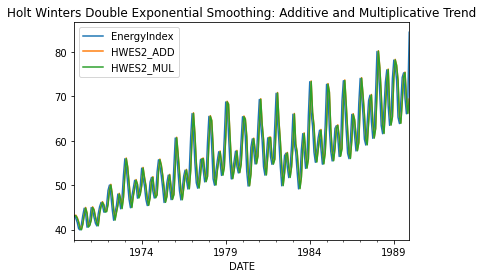

In [13]:
df[["EnergyIndex","HWES2_ADD","HWES2_MUL"]].plot(title="Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend");

In [14]:
df["HWES3_ADD"] = ExponentialSmoothing(df["EnergyIndex"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
df["HWES3_MUL"] = ExponentialSmoothing(df["EnergyIndex"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [15]:
df.head()

,EnergyIndex,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
DATE,,,,,,
1970-01-01,43.0869,43.086900,43.086814,43.085523,43.278824,43.084278
1970-02-01,42.5577,43.086900,43.259764,43.114541,41.795438,41.068138
1970-03-01,41.6215,43.064850,42.730564,42.585001,40.062243,39.724721
1970-04-01,40.1982,43.004710,41.794364,41.648200,38.738854,37.962226
1970-05-01,39.9321,42.887772,40.371064,40.223987,38.955016,38.600747


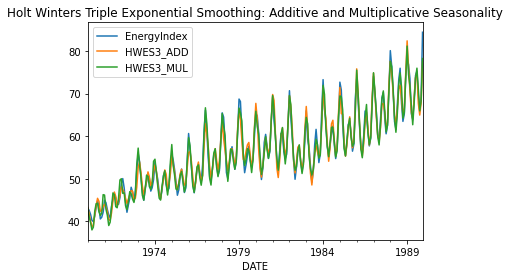

In [16]:
df[["EnergyIndex","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality");

# But the Assignment says Holt winters fitted model using Triple exponential model with multiplicative models

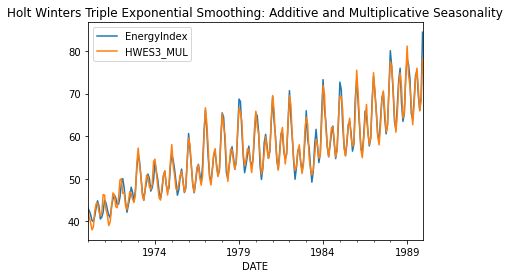

In [17]:
df[["EnergyIndex","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality");

# Plot and And analysis for the first two years

In [18]:
df.columns

Index(['EnergyIndex', 'HWES1', 'HWES2_ADD', 'HWES2_MUL', 'HWES3_ADD',
       'HWES3_MUL'],
      dtype='object')

In [19]:
assignment_dataFrame = df[["EnergyIndex", "HWES3_MUL"]]
####To check firt 10 values
assignment_dataFrame.head(10)

,EnergyIndex,HWES3_MUL
DATE,,
1970-01-01,43.0869,43.084278
1970-02-01,42.5577,41.068138
1970-03-01,41.6215,39.724721
1970-04-01,40.1982,37.962226
1970-05-01,39.9321,38.600747
1970-06-01,41.1847,42.335724
1970-07-01,43.2230,44.122462
1970-08-01,44.8138,44.223047
1970-09-01,43.6007,42.200592


In [20]:
assignment_dataFrame['day'] = df.index.day
assignment_dataFrame['month'] = df.index.month
assignment_dataFrame['year'] = df.index.year

<ipython-input-20-02bf403e16fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assignment_dataFrame['day'] = df.index.day
<ipython-input-20-02bf403e16fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assignment_dataFrame['month'] = df.index.month
<ipython-input-20-02bf403e16fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [21]:
assignment_dataFrame.head()

,EnergyIndex,HWES3_MUL,day,month,year
DATE,,,,,
1970-01-01,43.0869,43.084278,1,1,1970
1970-02-01,42.5577,41.068138,1,2,1970
1970-03-01,41.6215,39.724721,1,3,1970
1970-04-01,40.1982,37.962226,1,4,1970
1970-05-01,39.9321,38.600747,1,5,1970


In [22]:
assignment_dataFrame["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [23]:
####The first two years are 1970, 1971
new_df = assignment_dataFrame[(assignment_dataFrame.year >= 1970) &  (assignment_dataFrame.year <= 1971)]
new_df.head(10)

,EnergyIndex,HWES3_MUL,day,month,year
DATE,,,,,
1970-01-01,43.0869,43.084278,1,1,1970
1970-02-01,42.5577,41.068138,1,2,1970
1970-03-01,41.6215,39.724721,1,3,1970
1970-04-01,40.1982,37.962226,1,4,1970
1970-05-01,39.9321,38.600747,1,5,1970
1970-06-01,41.1847,42.335724,1,6,1970
1970-07-01,43.2230,44.122462,1,7,1970
1970-08-01,44.8138,44.223047,1,8,1970
1970-09-01,43.6007,42.200592,1,9,1970


In [24]:
df_new_data = new_df[["EnergyIndex", "HWES3_MUL"]]
df_new_data.head()

,EnergyIndex,HWES3_MUL
DATE,,
1970-01-01,43.0869,43.084278
1970-02-01,42.5577,41.068138
1970-03-01,41.6215,39.724721
1970-04-01,40.1982,37.962226
1970-05-01,39.9321,38.600747


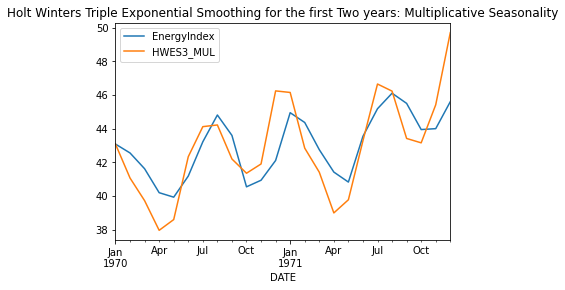

In [25]:
df_new_data[["EnergyIndex","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing for the first Two years: Multiplicative Seasonality");

# Forecasting using regression

In [30]:
forecast = pd.read_csv("EnergyProduction.csv", index_col='DATE', parse_dates=True)
shape_val = forecast.shape
shape_val

(240, 1)

In [32]:
split_formular = (30/100)*shape_val[0]
print(split_formular)
print(shape_val[0]-split_formular)

72.0
168.0


In [33]:
forecast.index.freq = "MS"
train_forecast = forecast[:168]
test_forecast = forecast[168:]

In [41]:
print(train_forecast.shape)
print(test_forecast.shape)

(168, 1)
(72, 1)


In [56]:
forecast_value = 72
fitted_model = ExponentialSmoothing(train_forecast["EnergyIndex"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(72)
print(test_predictions.shape)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


(72,)


In [57]:
test_predictions.head()

1984-01-01    71.847900
1984-02-01    68.652135
1984-03-01    64.294587
1984-04-01    58.864536
1984-05-01    56.091556
Freq: MS, dtype: float64

<AxesSubplot:title={'center':'Train, Test and Predicted Test using Holt Winters'}, xlabel='DATE'>

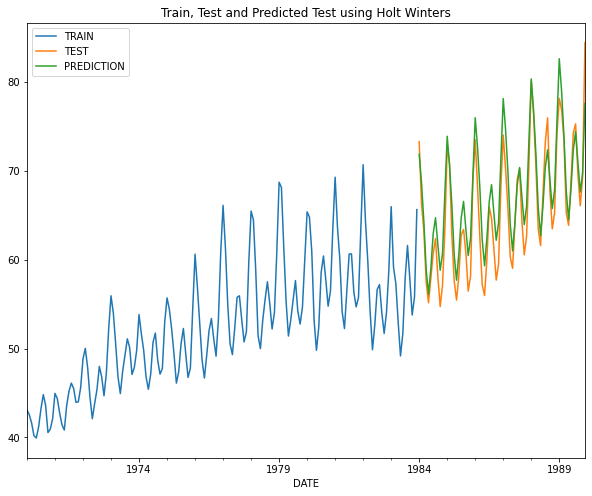

In [58]:
plt.title("Train, Test and Predicted Test using Holt Winters")
train_forecast["EnergyIndex"].plot(legend=True,label="TRAIN")
test_forecast["EnergyIndex"].plot(legend=True,label="TEST",figsize=(10,8))
test_predictions.plot(legend=True,label="PREDICTION")

enter date range in format(yy-mm-dd): 1989-01-01
enter date range in format(yy-mm-dd): 1994-01-01


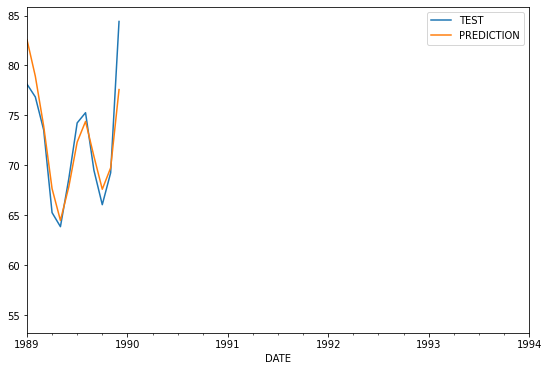

In [61]:
###Create your date Range for prediction....
date_range = []
for i in range(0, 2):
    enterdate = input("enter date range in format(yy-mm-dd): ")
    date_range.append(enterdate)

test_forecast["EnergyIndex"].plot(legend=True,label="TEST",figsize=(9,6))
test_predictions.plot(legend=True,label="PREDICTION",xlim=date_range);

# Model Evaluation Metrics

In [62]:
##Model Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"Mean Absolute Error = {mean_absolute_error(test_forecast,test_predictions)}")
print(f"Mean Squared Error = {mean_squared_error(test_forecast,test_predictions)}")

Mean Absolute Error = 2.4579343376547715
Mean Squared Error = 8.250274794373865
